In [1]:
import os
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# 数据所在文件夹
base_dir = 'data/dogs-vs-cats'
train_dir = os.path.join(base_dir, 'train/train')
validation_dir = os.path.join(base_dir, 'validation/validation')

#Train
train_cats_dir = os.path.join(train_dir, 'cat_min')
train_dogs_dir = os.path.join(train_dir, 'dog_min')

#Validation
validation_cats_dir = os.path.join(validation_dir, 'cat_min')
validation_dogs_dir = os.path.join(validation_dir, 'dog_min')

In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    
])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0

In [5]:
model.compile(loss='binary_crossentropy',
             optimizer=Adam(lr=1e-4),
             metrics=['accuracy'])

In [8]:
train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen=ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        #文件夹路径
        train_dir,
        #数据图片大小
        target_size=(64,64),
        batch_size=20,
        #one-hot就是categorical，二分类就是binary
        class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(64,64),
        batch_size=20,
        class_mode='binary'
)

history = model.fit_generator(
    train_generator,
    steps_per_epoch=180,# images = batch_size * steps
    epochs=20,
    validation_data=validation_generator,
    validation_steps=18,
    verbose=2
)

Found 3584 images belonging to 2 classes.
Found 358 images belonging to 2 classes.
Epoch 1/20
180/180 - 15s - loss: 0.5393 - accuracy: 0.7266 - val_loss: 0.5565 - val_accuracy: 0.7263
Epoch 2/20
180/180 - 15s - loss: 0.5335 - accuracy: 0.7319 - val_loss: 0.4965 - val_accuracy: 0.7877
Epoch 3/20
180/180 - 16s - loss: 0.5426 - accuracy: 0.7241 - val_loss: 0.4981 - val_accuracy: 0.8045
Epoch 4/20
180/180 - 16s - loss: 0.5390 - accuracy: 0.7249 - val_loss: 0.4881 - val_accuracy: 0.7961
Epoch 5/20
180/180 - 16s - loss: 0.5172 - accuracy: 0.7408 - val_loss: 0.5162 - val_accuracy: 0.7793
Epoch 6/20
180/180 - 16s - loss: 0.5294 - accuracy: 0.7229 - val_loss: 0.4875 - val_accuracy: 0.7905
Epoch 7/20
180/180 - 16s - loss: 0.5243 - accuracy: 0.7408 - val_loss: 0.5302 - val_accuracy: 0.7430
Epoch 8/20
180/180 - 16s - loss: 0.5177 - accuracy: 0.7366 - val_loss: 0.5130 - val_accuracy: 0.7626
Epoch 9/20
180/180 - 16s - loss: 0.5077 - accuracy: 0.7500 - val_loss: 0.4798 - val_accuracy: 0.7877
Epoch 10

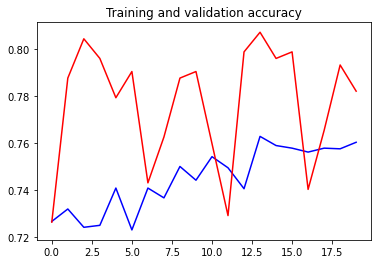

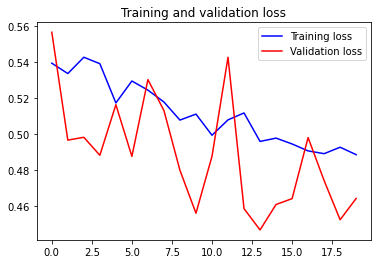

In [10]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.show()
plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


# dropout

In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
    
])

model.compile(loss='binary_crossentropy',
             optimizer=Adam(lr=1e-4),
             metrics=['accuracy'])

In [13]:
train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen=ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        #文件夹路径
        train_dir,
        #数据图片大小
        target_size=(64,64),
        batch_size=20,
        #one-hot就是categorical，二分类就是binary
        class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(64,64),
        batch_size=20,
        class_mode='binary'
)

history = model.fit_generator(
    train_generator,
    steps_per_epoch=180,# images = batch_size * steps
    epochs=20,
    validation_data=validation_generator,
    validation_steps=18,
    verbose=2
)

Found 3584 images belonging to 2 classes.
Found 358 images belonging to 2 classes.
Epoch 1/20
180/180 - 14s - loss: 0.6895 - accuracy: 0.5301 - val_loss: 0.6869 - val_accuracy: 0.5196
Epoch 2/20
180/180 - 14s - loss: 0.6730 - accuracy: 0.5720 - val_loss: 0.6446 - val_accuracy: 0.6145
Epoch 3/20
180/180 - 14s - loss: 0.6512 - accuracy: 0.6119 - val_loss: 0.6543 - val_accuracy: 0.6341
Epoch 4/20
180/180 - 14s - loss: 0.6313 - accuracy: 0.6392 - val_loss: 0.6075 - val_accuracy: 0.6704
Epoch 5/20
180/180 - 14s - loss: 0.6215 - accuracy: 0.6509 - val_loss: 0.6073 - val_accuracy: 0.6872
Epoch 6/20
180/180 - 14s - loss: 0.6102 - accuracy: 0.6618 - val_loss: 0.5725 - val_accuracy: 0.7235
Epoch 7/20
180/180 - 14s - loss: 0.6033 - accuracy: 0.6735 - val_loss: 0.5829 - val_accuracy: 0.6955
Epoch 8/20
180/180 - 14s - loss: 0.5870 - accuracy: 0.6786 - val_loss: 0.5778 - val_accuracy: 0.7039
Epoch 9/20
180/180 - 14s - loss: 0.5915 - accuracy: 0.6775 - val_loss: 0.5383 - val_accuracy: 0.7570
Epoch 10

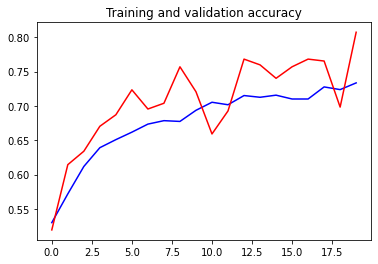

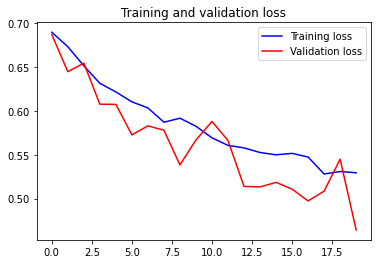

In [14]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.show()
plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
